In [1]:
import sys
sys.path.append('../../..')
from viz.match_data import extract_match_complete
from viz.pass_network import plot_pass_network
from viz.pass_analysis import plot_pass_flow, plot_pass_hull
from viz.shot_xg import plot_shot_xg
from viz.shot_map_report import plot_shot_report
from viz.stats_table import create_player_analysis_complete
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Datos del partido
WS_ID = 1913921
US_ID = 29193
LEAGUE = 'ESP-La Liga'
SEASON = '25-26'
HOME_TEAM = 'Atletico'
AWAY_TEAM = 'Villarreal'
MATCH_DATE = '2025-09-13'

# Extracción completa de datos
result = extract_match_complete(
    ws_id=WS_ID,
    us_id=US_ID,
    league=LEAGUE,
    season=SEASON,
    home_team=HOME_TEAM,
    away_team=AWAY_TEAM,
    match_date=MATCH_DATE
)


Extracting: Atletico vs Villarreal (2025-09-13)
--------------------------------------------------
1. match_events.csv: 1884 events
2. player_network.csv: 256 records
3. match_aggregates.csv: 68 records
4. spatial_analysis.csv: 50 spatial records
5. match_info.csv: 94 info records

Shots: 16 | Goals: 2 | xG: 2.18


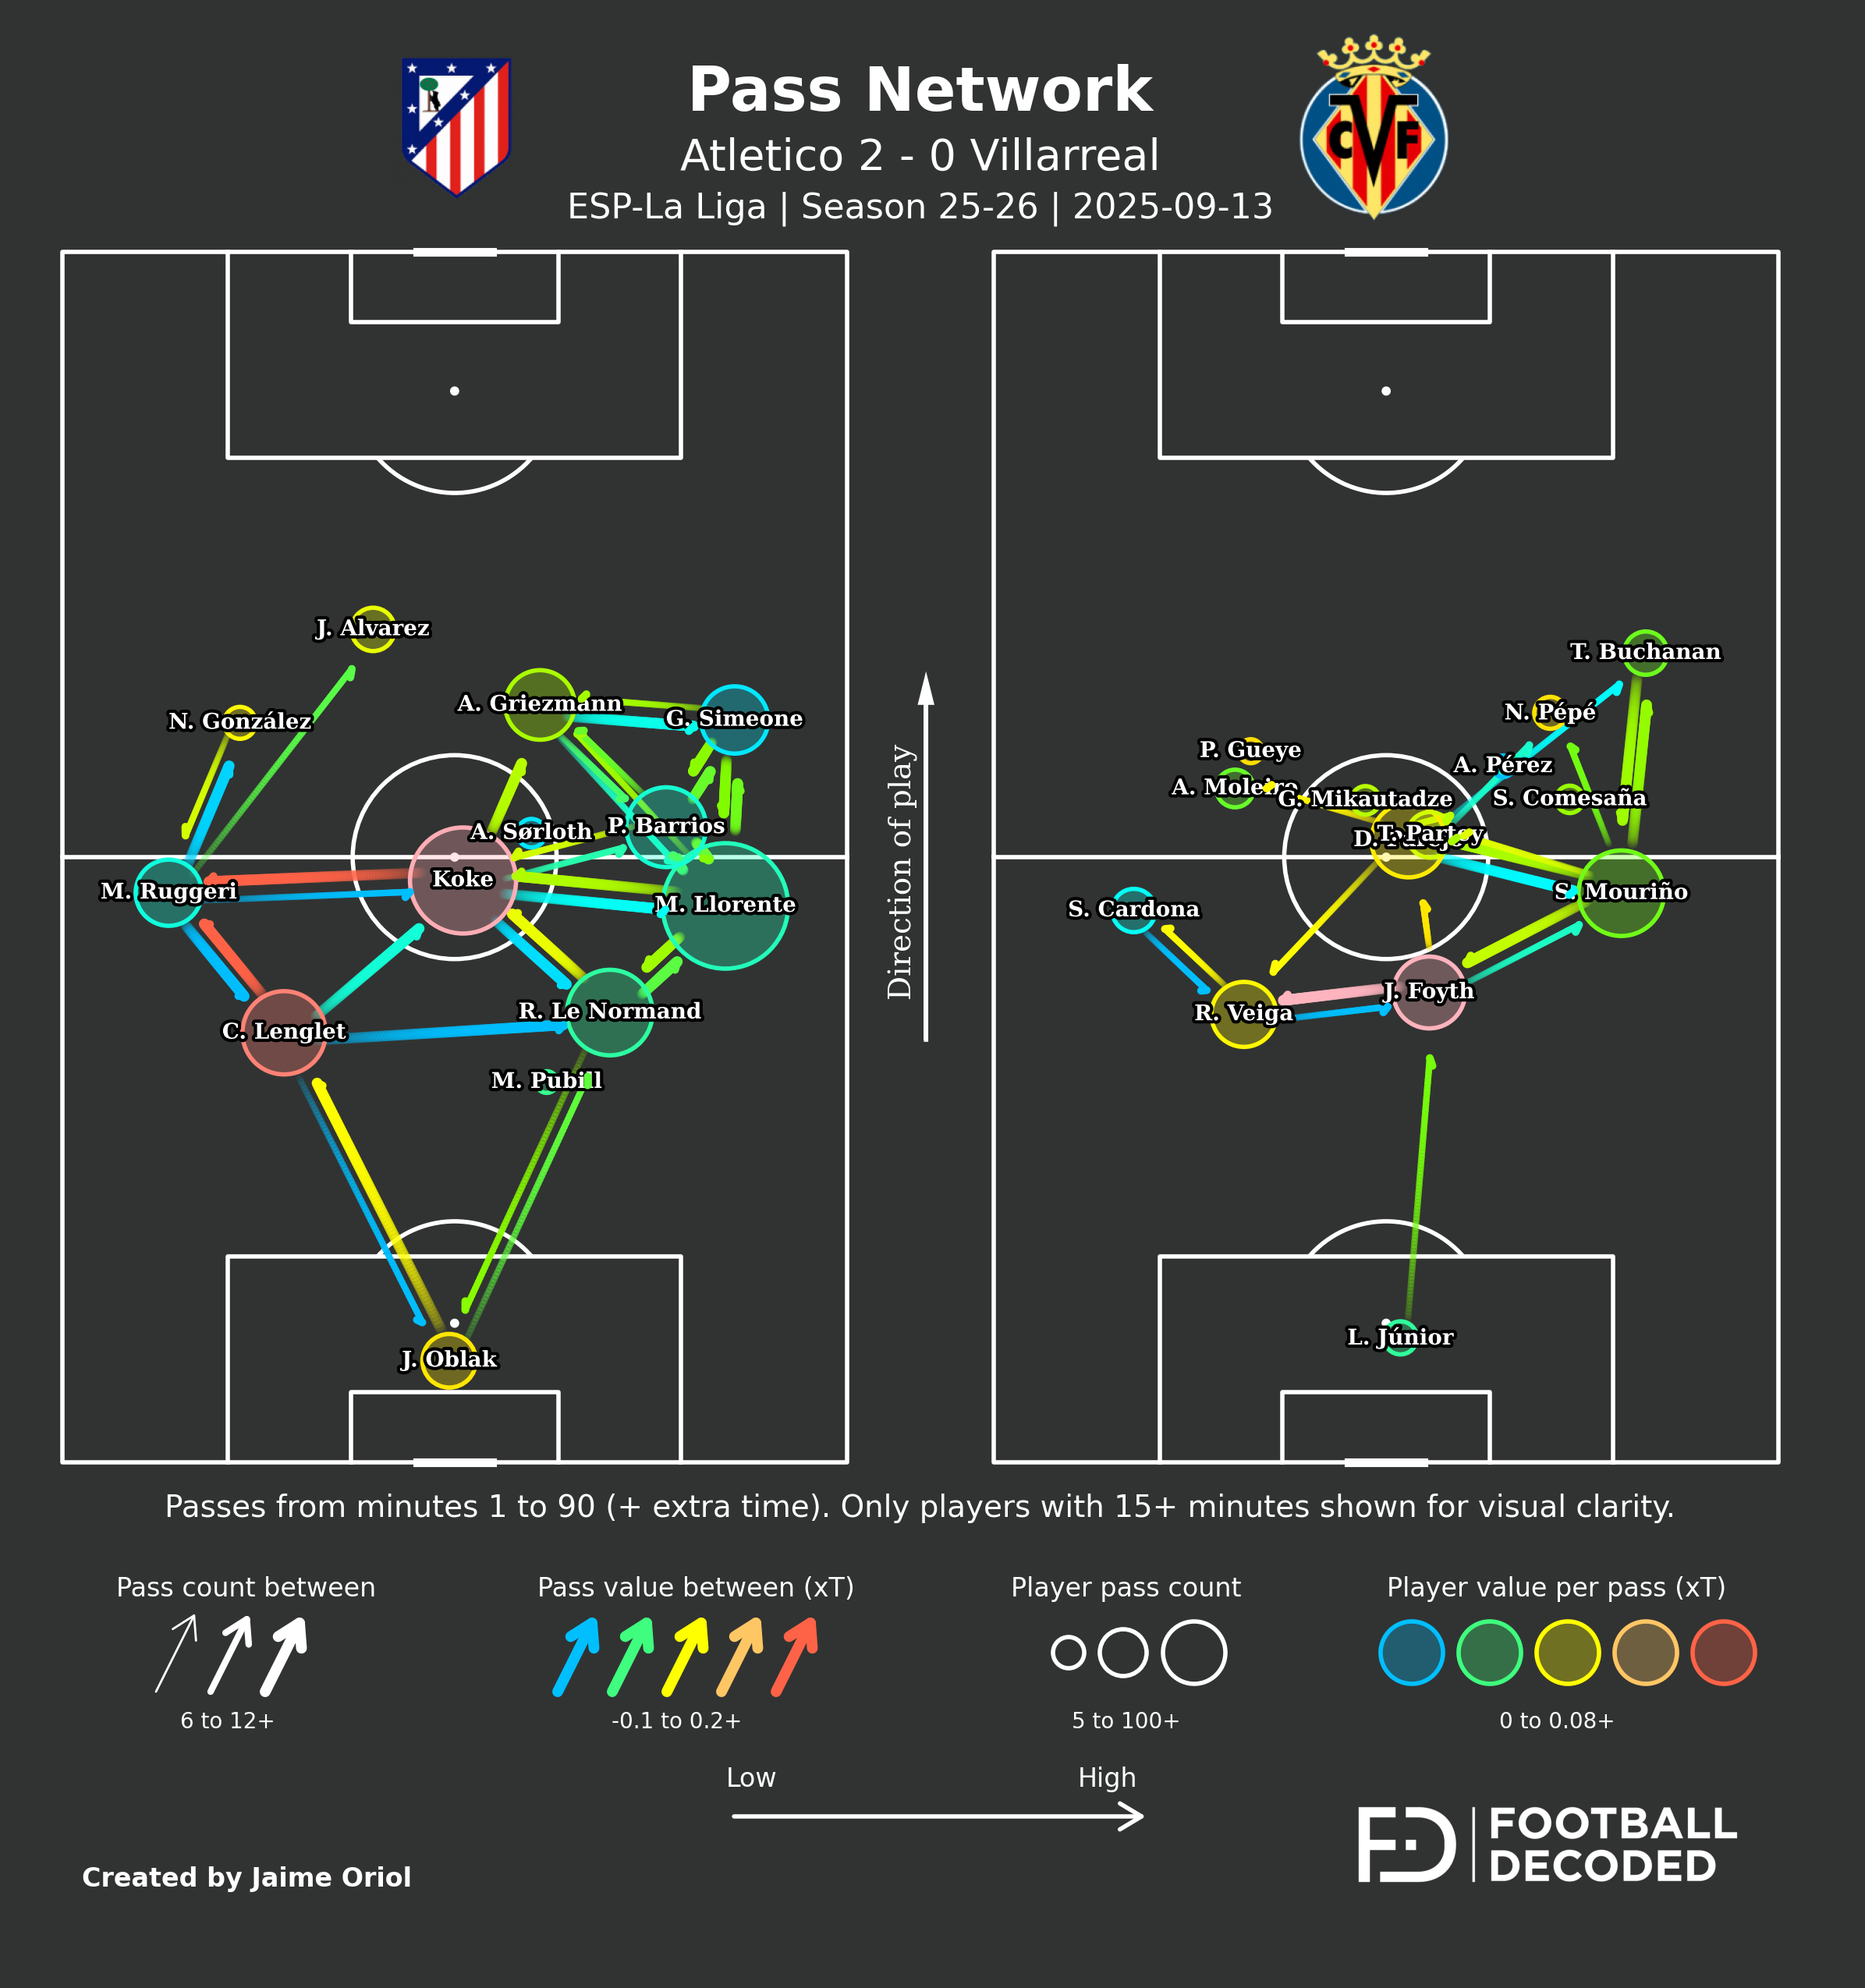

In [3]:
fig_network = plot_pass_network(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path='../logos/LaLiga/Atleti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png'
)

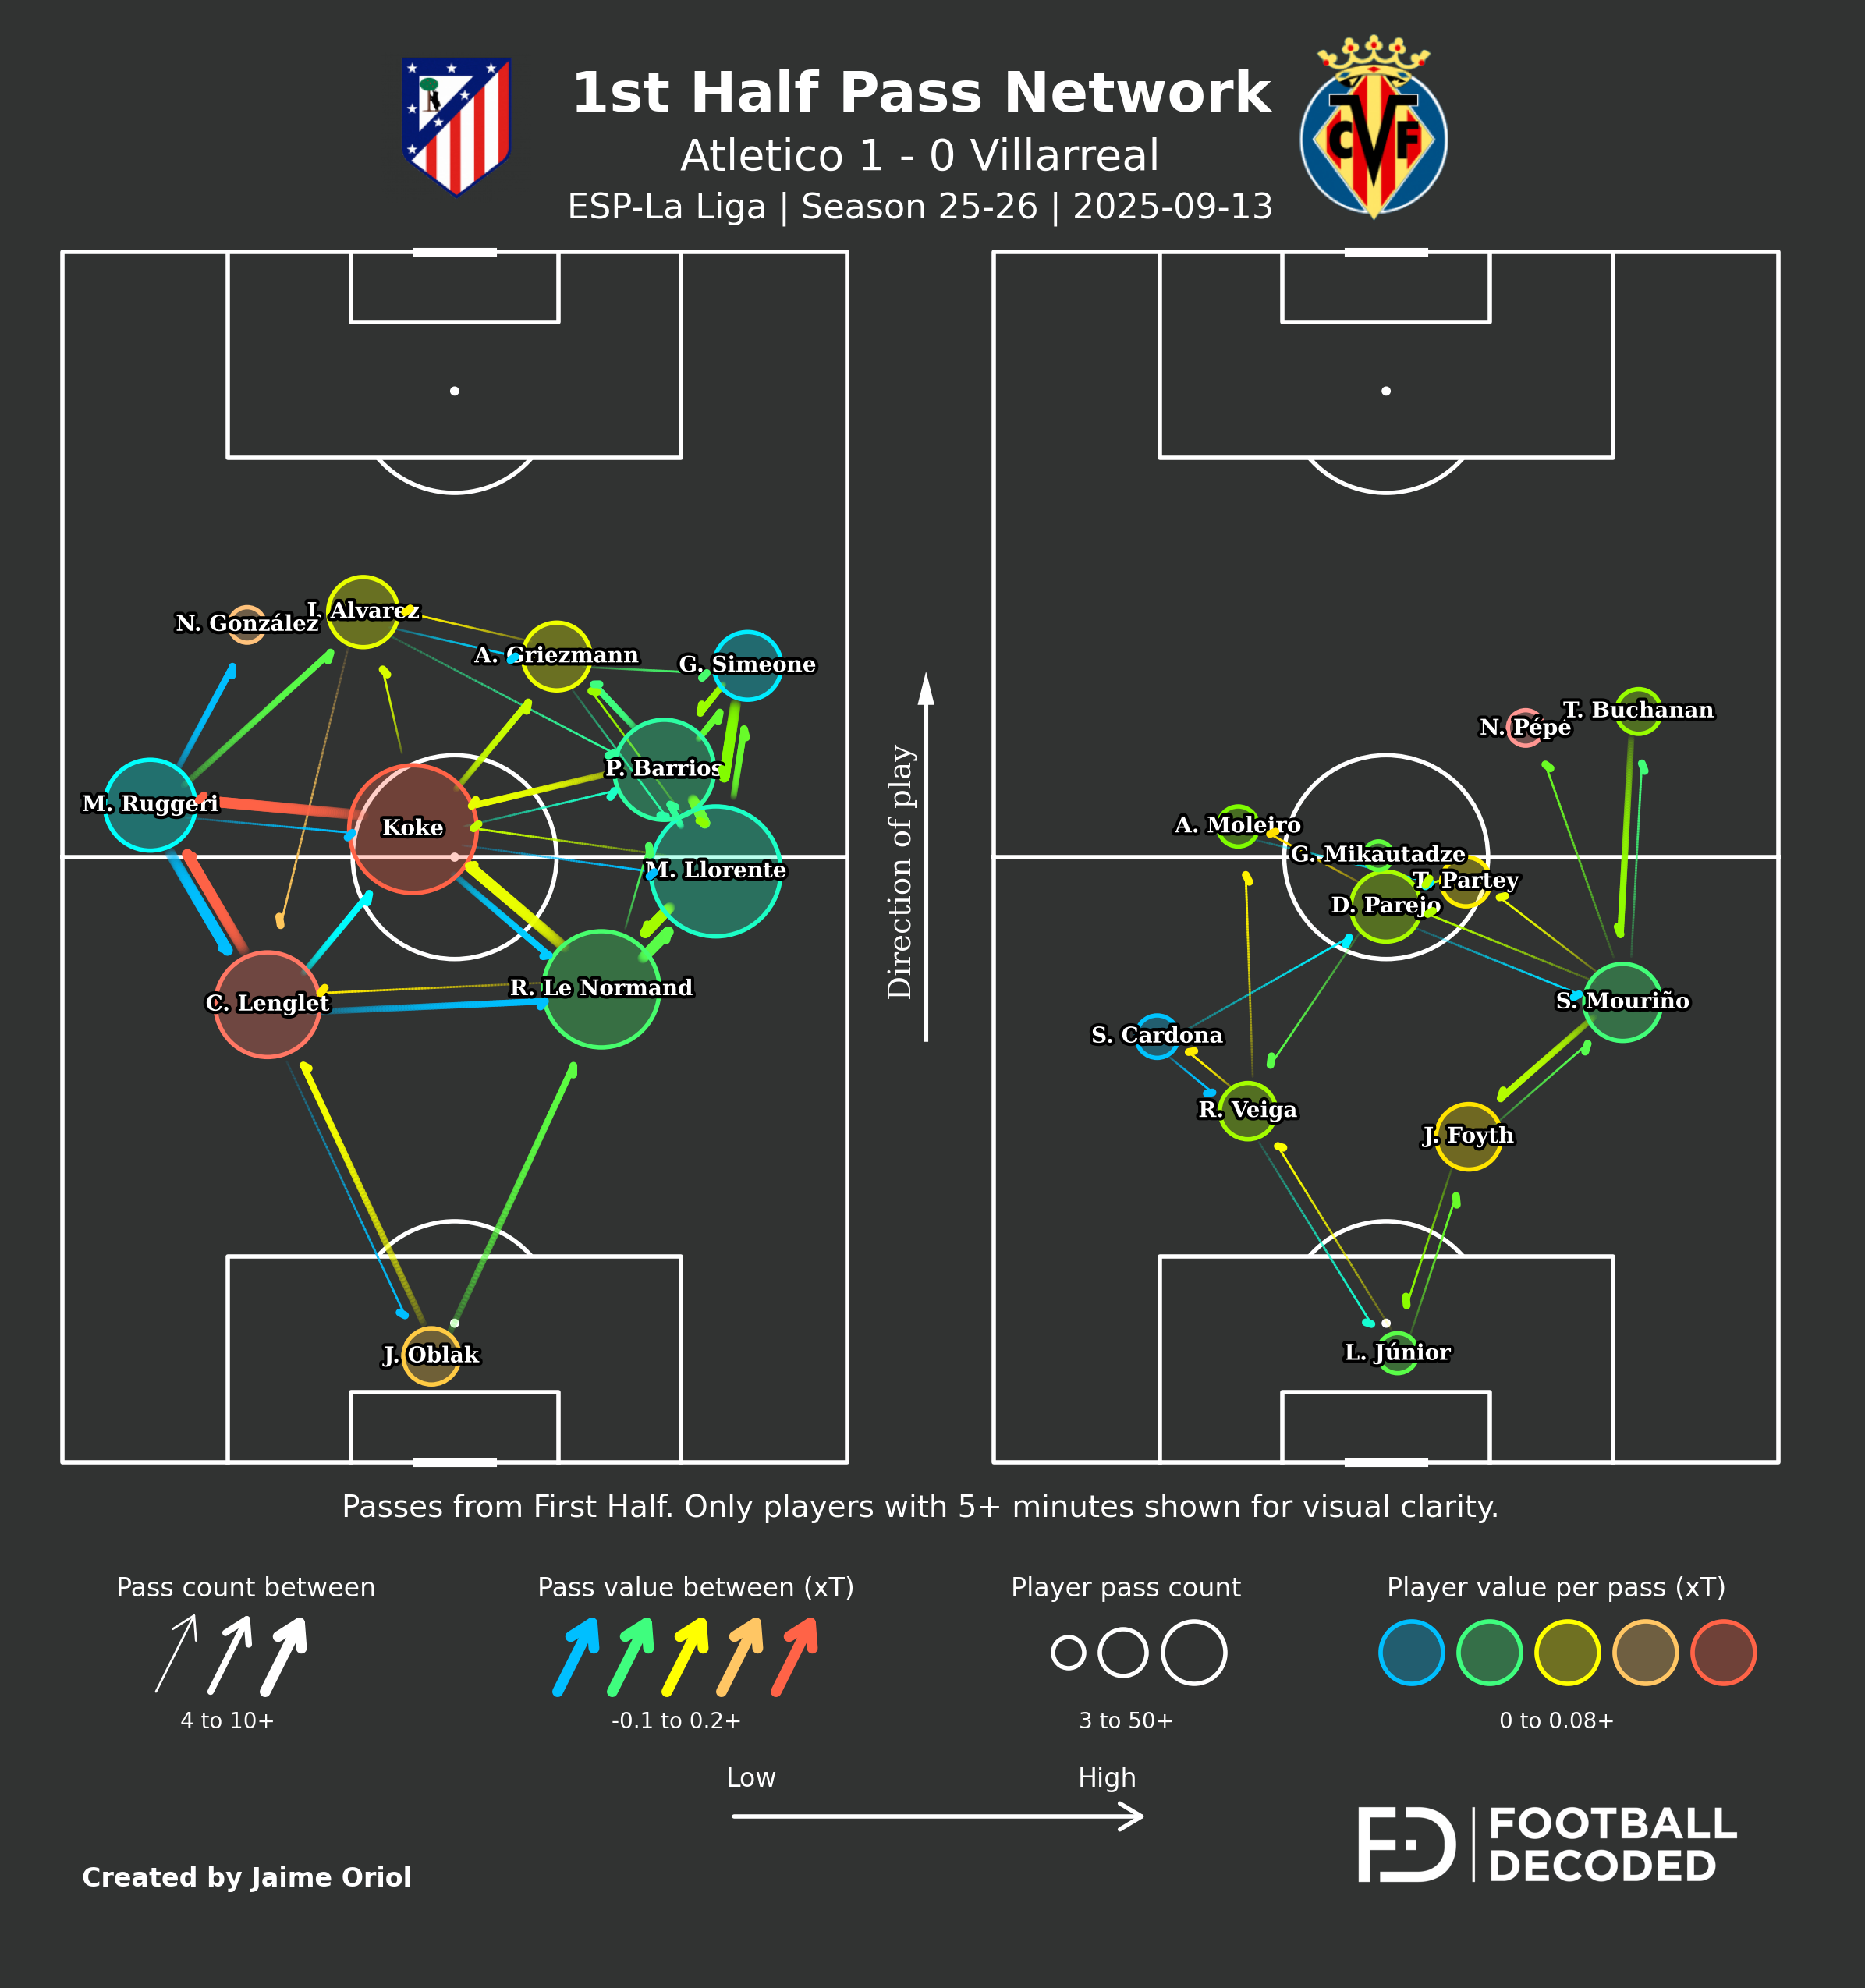

In [ ]:
# Pass network primer tiempo (jugadores >5 minutos primer tiempo)
from viz.pass_network import plot_pass_network_first_half
fig_network_44 = plot_pass_network_first_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path='../logos/LaLiga/Atleti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png'
)

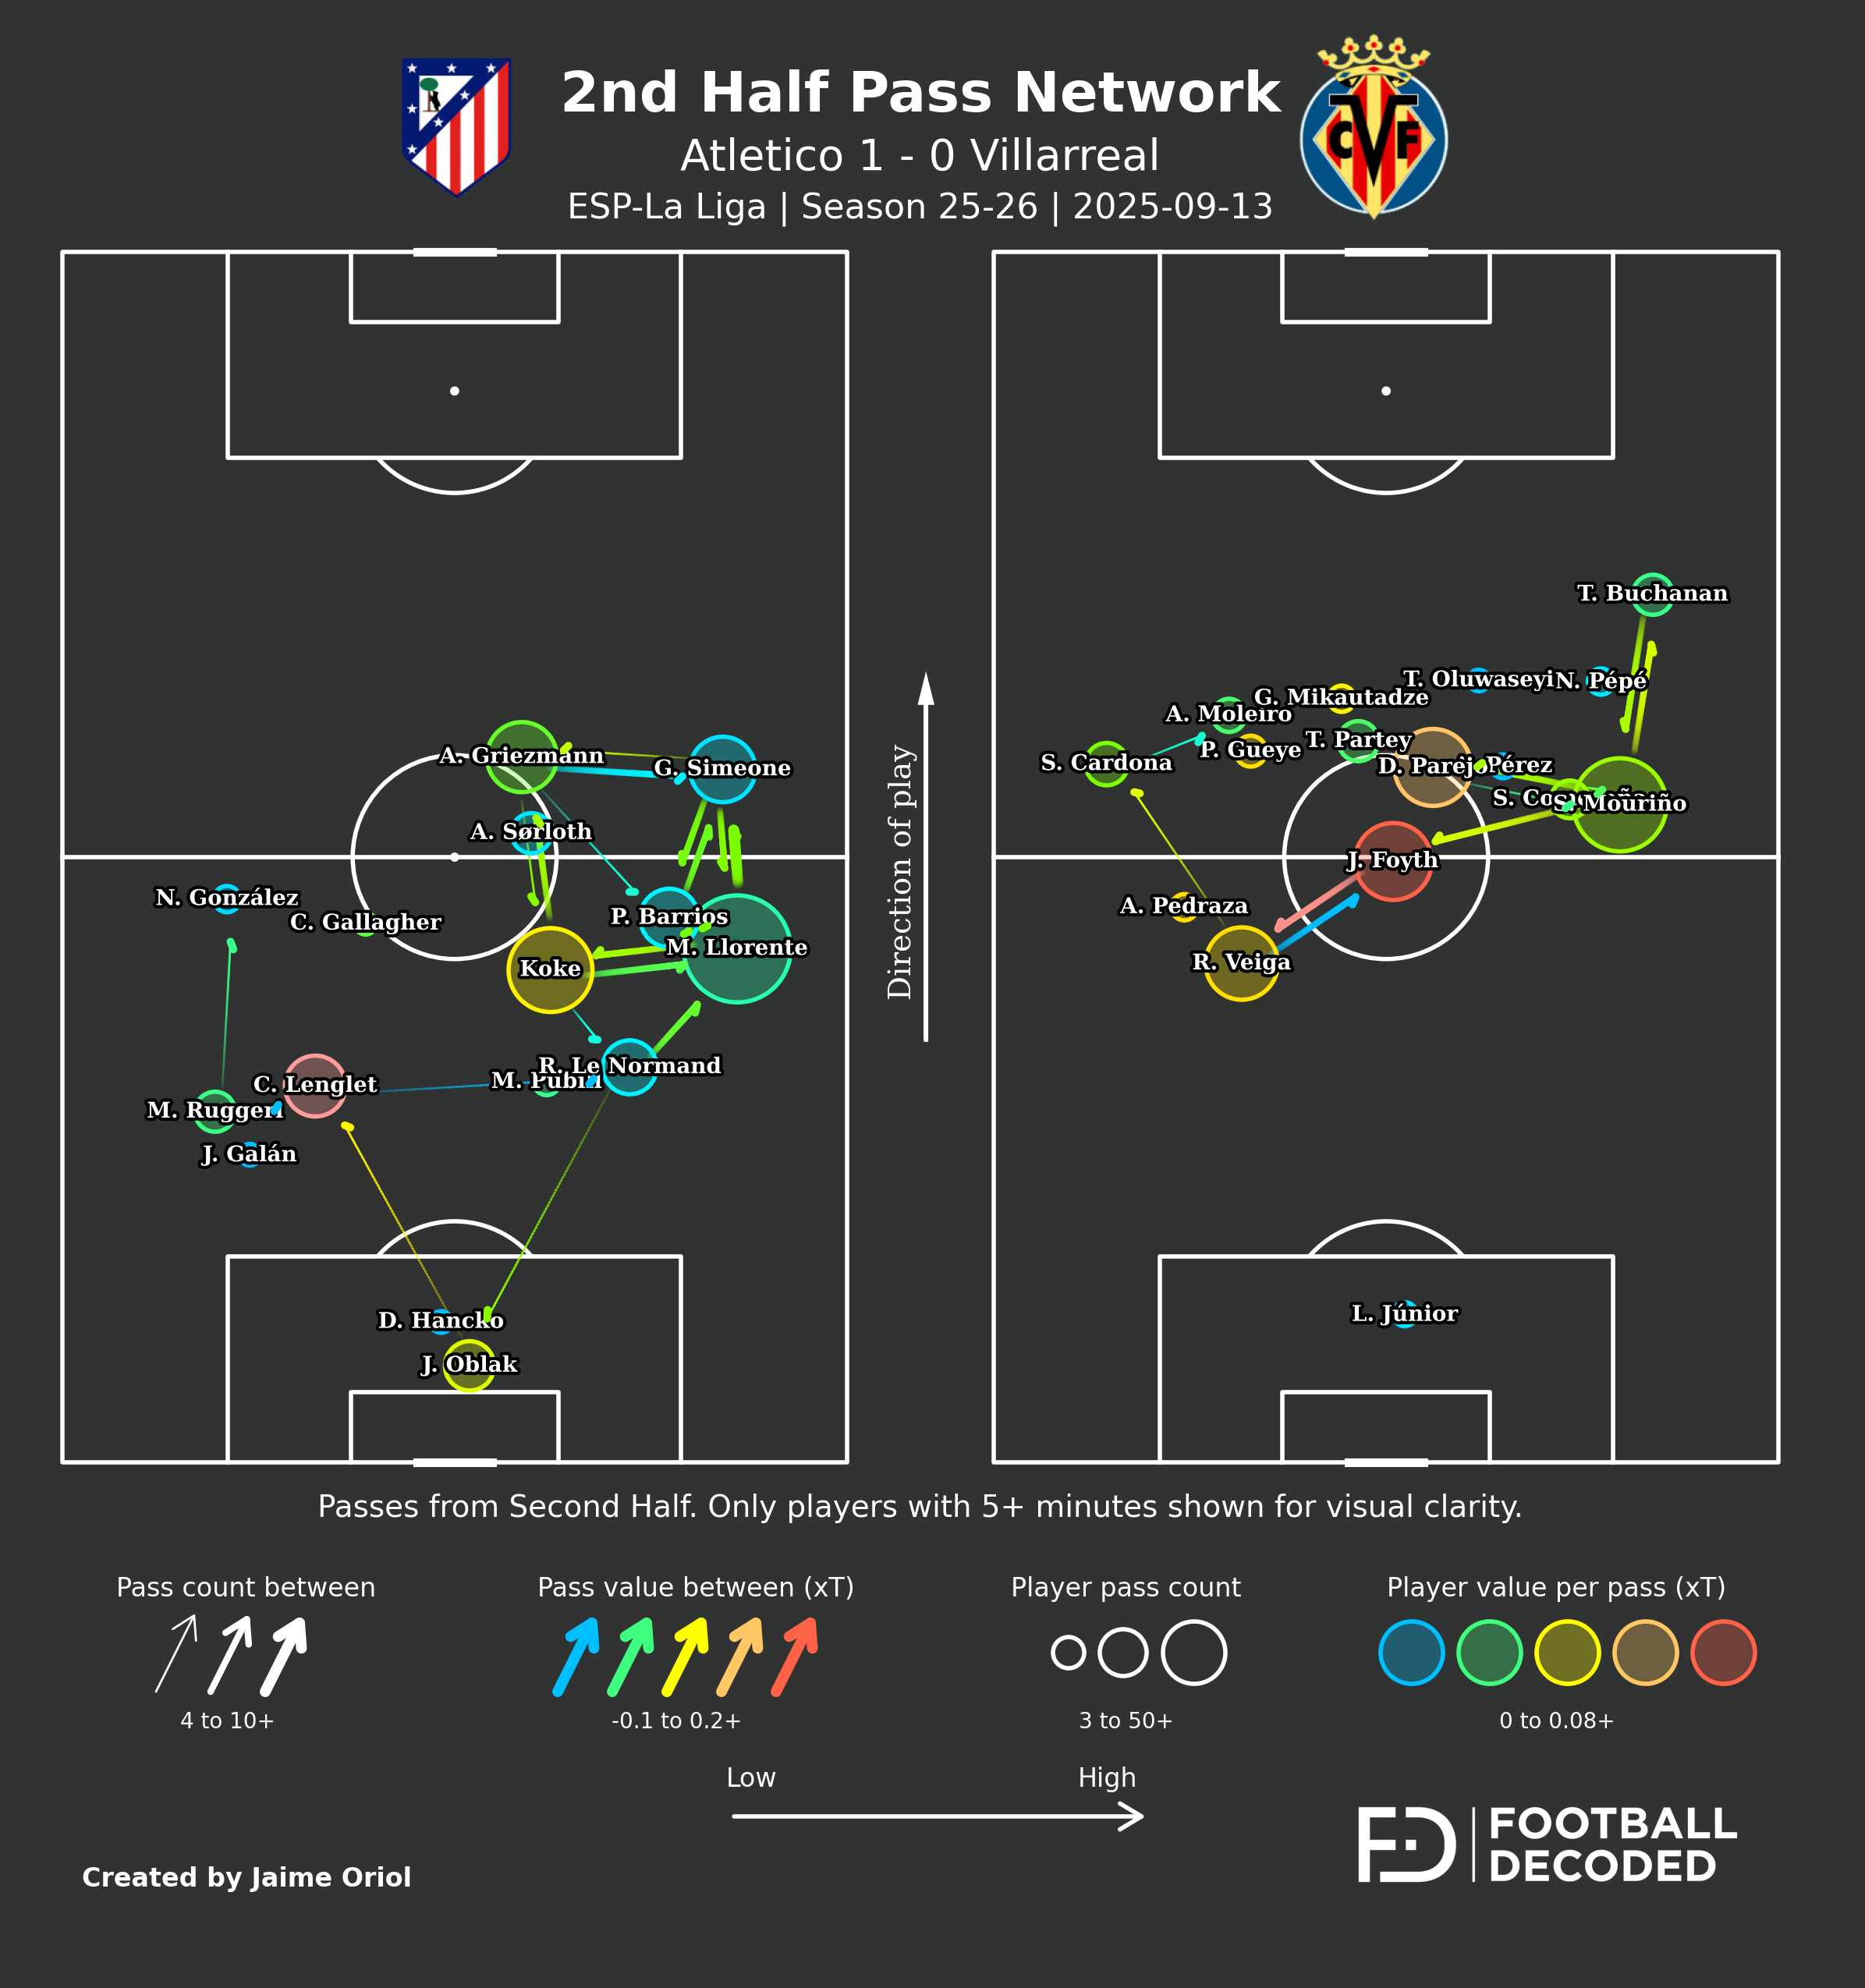

In [9]:
# Pass network segundo tiempo (jugadores >5 minutos segudno tiempo)
from viz.pass_network import plot_pass_network_second_half
fig_network_90 = plot_pass_network_second_half(
    network_csv_path='../../viz/data/player_network.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_logo_path='../logos/LaLiga/Atleti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png'
)

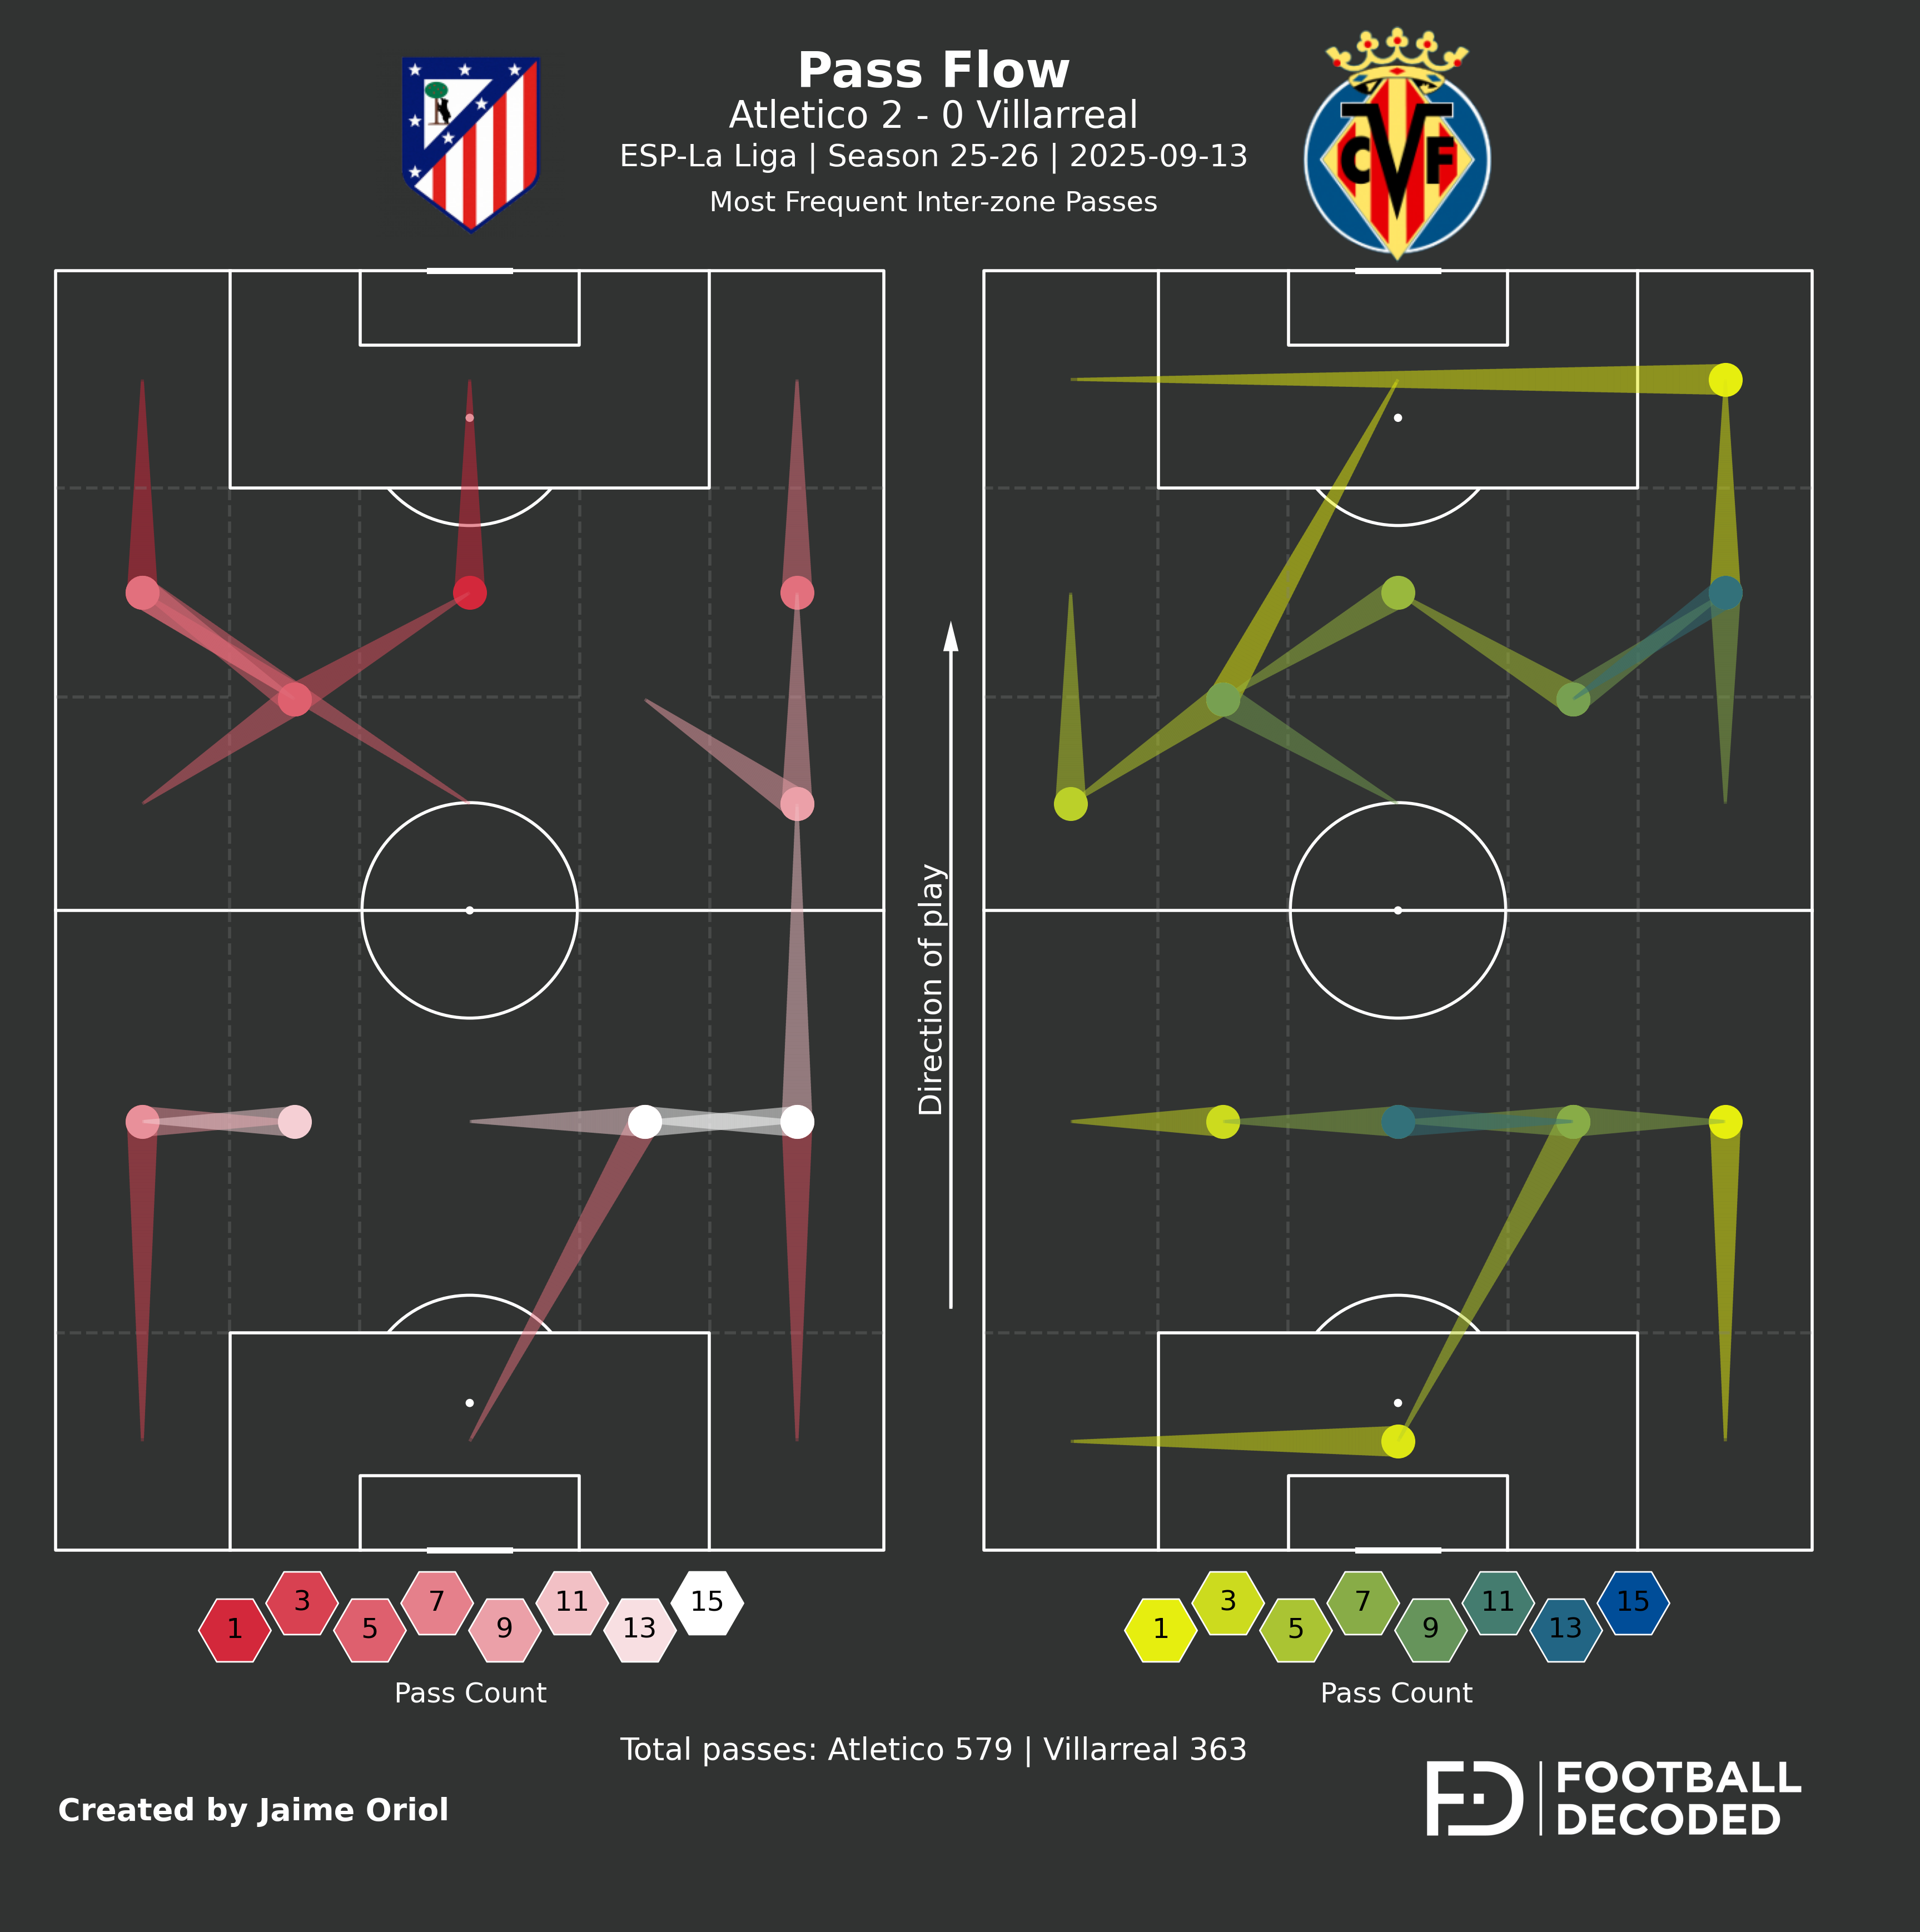

In [5]:
# Pass Flow
fig_flow = plot_pass_flow(
    events_csv_path='../../viz/data/match_events.csv',
    info_csv_path='../../viz/data/match_info.csv',
    home_colors=['#CE1126', '#FFFFFF'],
    away_colors=['#FFFF00', '#004D98'],
    home_logo_path='../logos/LaLiga/Atleti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png'
)

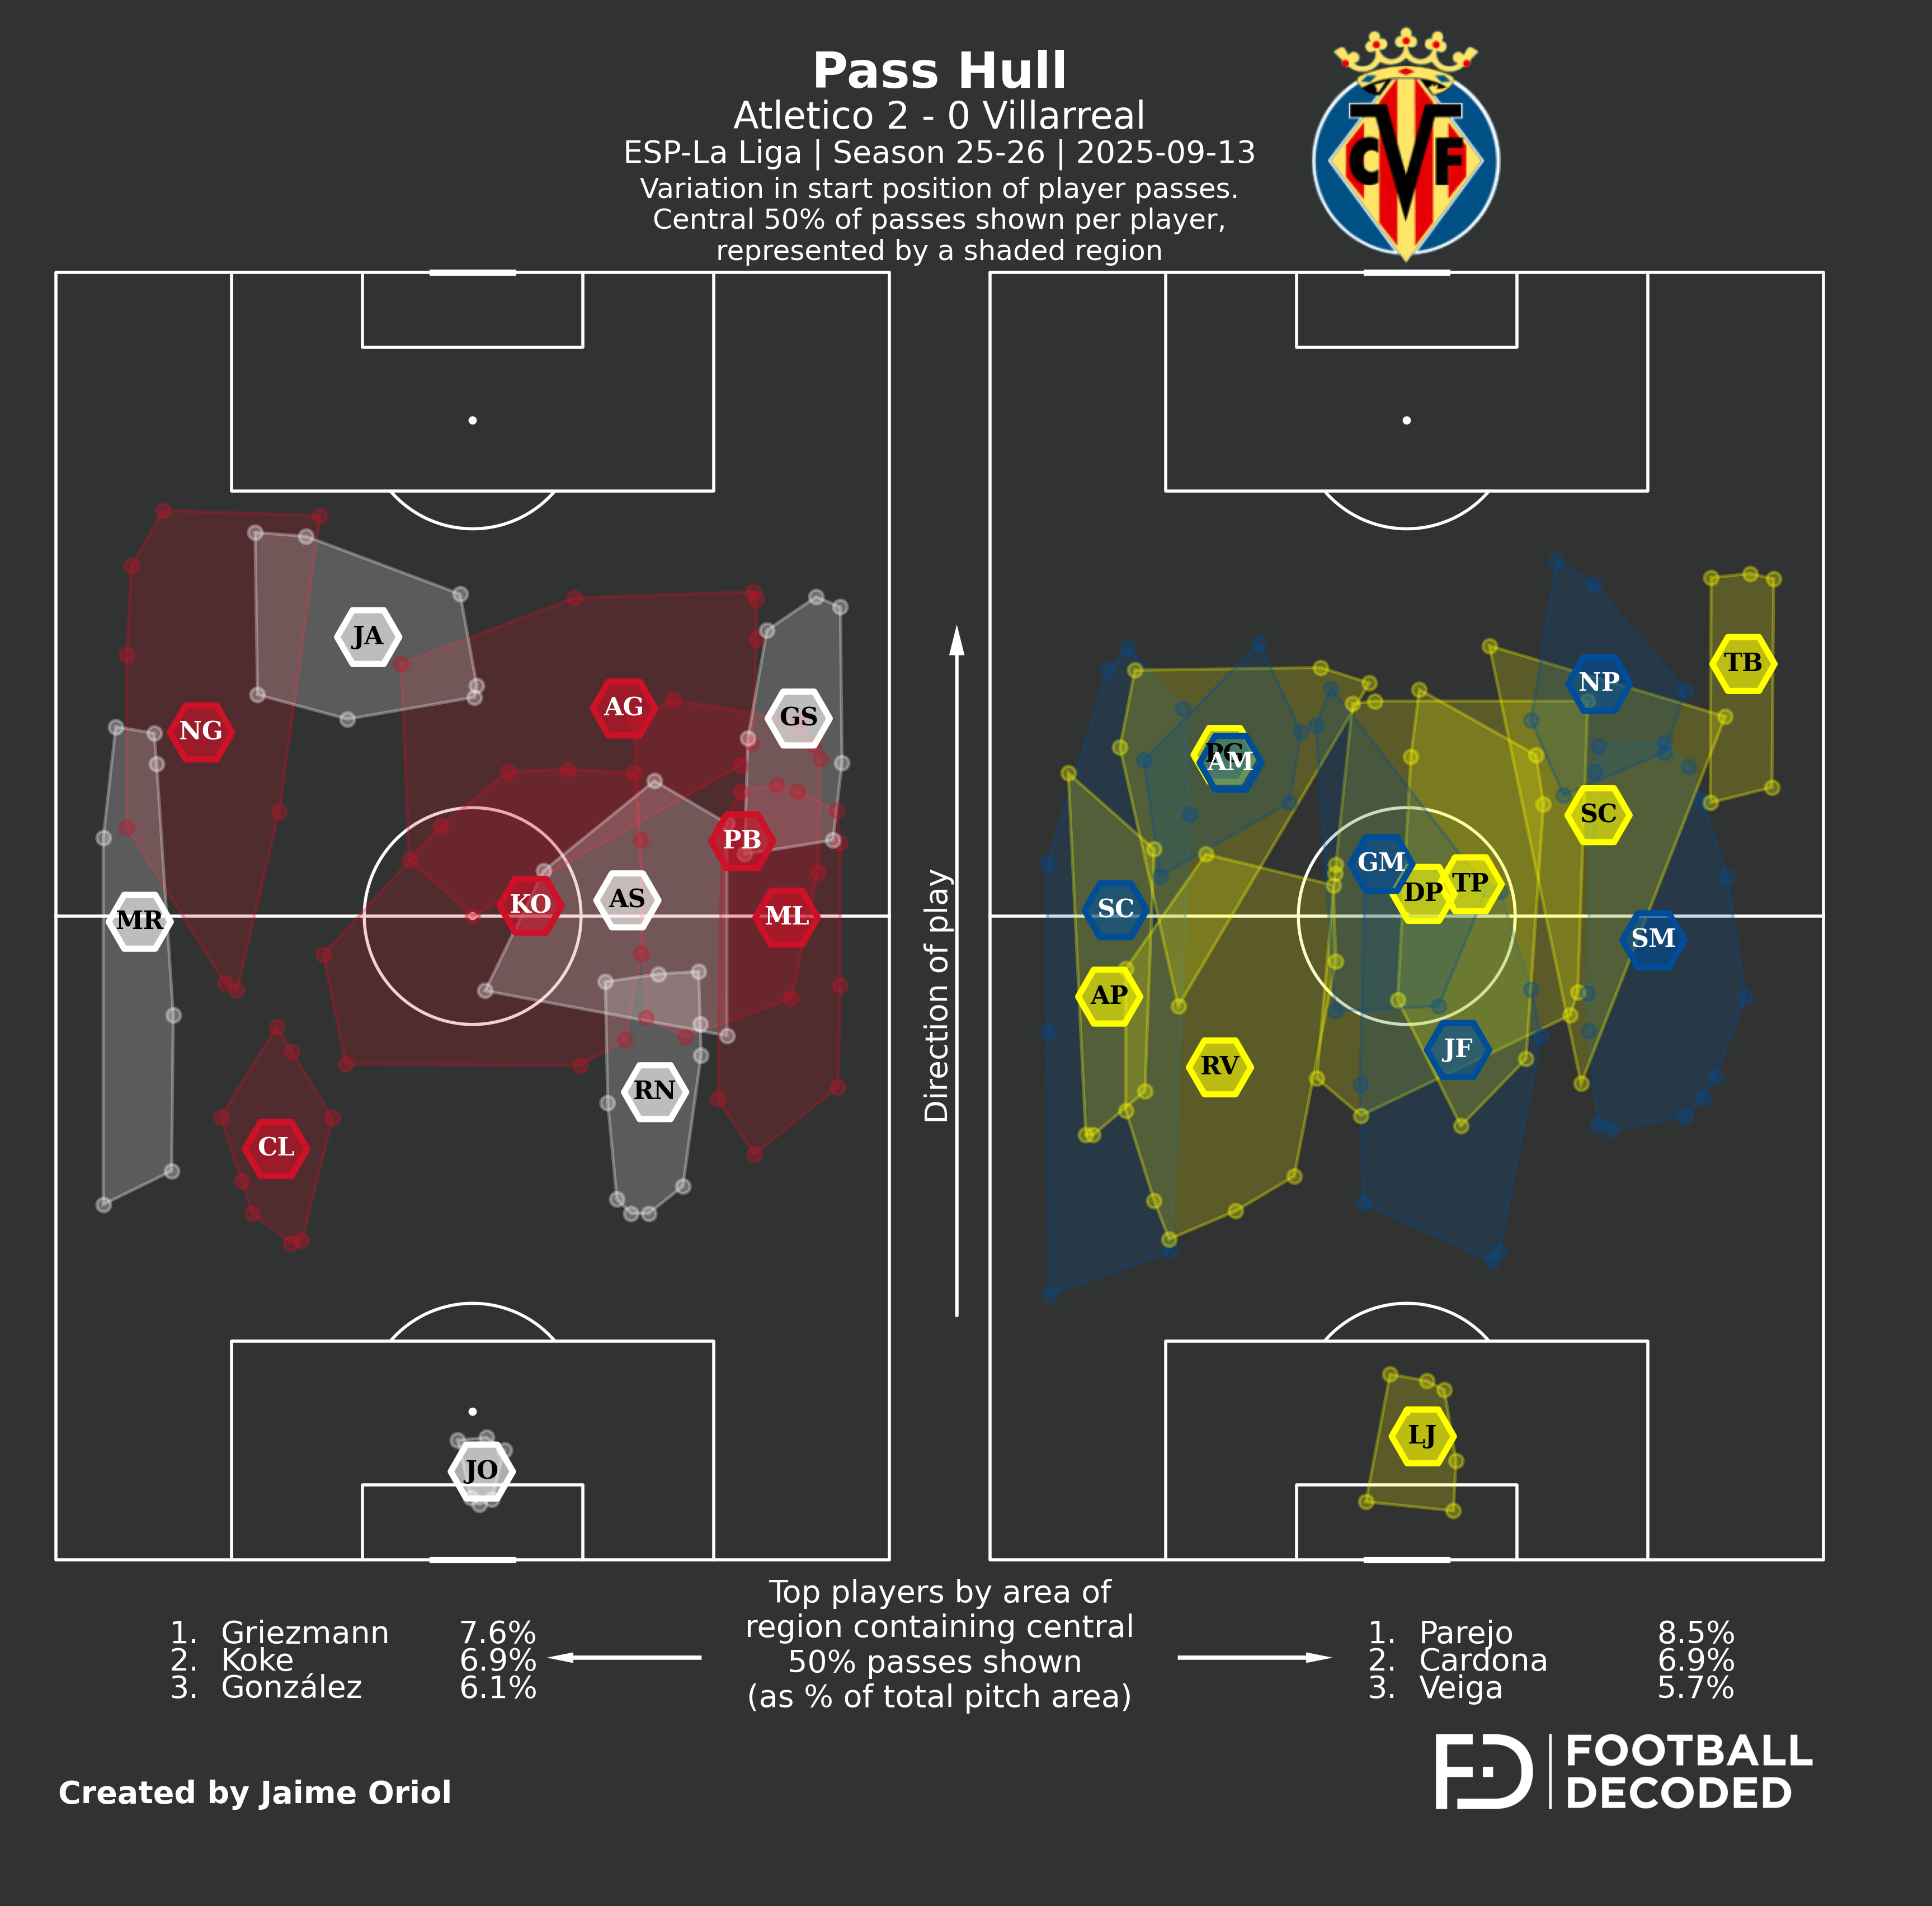

In [6]:
# Pass Hull
fig_hull = plot_pass_hull(
    events_csv_path='../../viz/data/match_events.csv',
    info_csv_path='../../viz/data/match_info.csv',
    aggregates_csv_path='../../viz/data/match_aggregates.csv',
    home_colors=['#CE1126', '#FFFFFF'],
    away_colors=['#FFFF00', '#004D98'],
    home_logo_path='../logos/LaLiga/Atelti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png'
)

Disparos: 16 | Goles: 2 | xG: 2.184


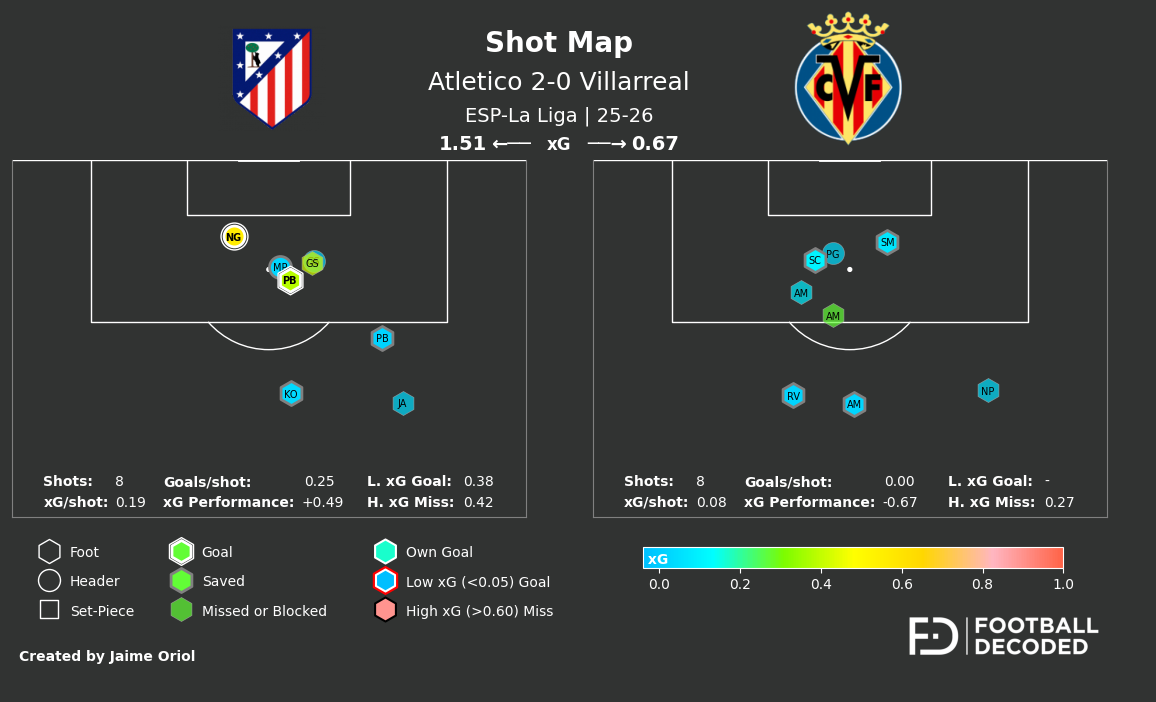

In [7]:
# Preparar datos de disparos
def create_shots_csv():
    events = pd.read_csv('../../viz/data/match_events.csv')
    shots = events[events['event_type'].str.contains('Shot|Goal', case=False, na=False)].copy()
    shots['is_goal'] = shots['event_type'] == 'Goal'
    shots['body_part'] = shots['qualifiers'].str.contains('Head', na=False).map({True: 'Head', False: 'Foot'})
    shots['xg'] = pd.to_numeric(shots['xg'], errors='coerce').fillna(0.0)
    shots.to_csv('../../viz/data/shots_temp.csv', index=False)
    print(f"Disparos: {len(shots)} | Goles: {shots['is_goal'].sum()} | xG: {shots['xg'].sum():.3f}")
    return shots

shots_data = create_shots_csv()

# Shot Map Report
fig_report = plot_shot_report(
    csv_path='../../viz/data/shots_temp.csv',
    home_logo_path='../logos/LaLiga/Atleti.png',
    away_logo_path='../logos/LaLiga/Villarreal.png',
    season='25-26'
)

In [8]:
# MARCOS LLORENTE - Centrocampista/Lateral derecho
events = pd.read_csv('../../viz/data/match_events.csv')
aggregates = pd.read_csv('../../viz/data/match_aggregates.csv')

llorente_enriched = [
    ("Minutes played", "90"),
    ("Assists", "1"),
    ("Accurate passes", "90/97 (93%)"),
    ("Passes into final third", "6"),
    ("Accurate crosses", "1/1 (100%)"),
    ("Accurate long balls", "5/7 (71%)"),
    ("Tackles", "2"),
    ("Ground duels won", "4/6 (67%)"),
    ("Recoveries", "5"),
    ("Touches", "113")
]

# Crear análisis completo
fig_llorente = create_player_analysis_complete(
    player_name='Marcos Llorente',
    team_name='Atlético Madrid 2-0 Villarreal',
    enriched_metrics=llorente_enriched,
    events_df=events,
    player_image_path='../caras/atm/Llorente.png'
)

TypeError: _create_passes_field() takes 5 positional arguments but 6 were given

In [ ]:
# KOKE - Centrocampista central
koke_enriched = [
    ("Minutes played", "90"),
    ("Accurate passes", "79/80 (99%)"),
    ("Passes into final third", "9"),
    ("Accurate long balls", "6/6 (100%)"),
    ("Ground duels won", "4/5 (80%)"),
    ("Recoveries", "6"),
    ("Was fouled", "3"),
    ("Total shots", "1"),
    ("Touches", "87"),
    ("Tackles", "1")
]

# Crear análisis completo
fig_koke = create_player_analysis_complete(
    player_name='Koke',
    team_name='Atlético Madrid 2-0 Villarreal',
    enriched_metrics=koke_enriched,
    events_df=events,
    player_image_path='../caras/atm/Koke.png'
)

In [ ]:
# PABLO BARRIOS - Centrocampista
barrios_enriched = [
    ("Minutes played", "90"),
    ("Goals", "1"),
    ("Shots on target", "1/2 (50%)"),
    ("Accurate passes", "56/70 (80%)"),
    ("Passes into final third", "8"),
    ("Touches in opposition box", "1"),
    ("Ground duels won", "2/4 (50%)"),
    ("Recoveries", "5"),
    ("Touches", "82"),
    ("Was fouled", "2")
]

# Crear análisis completo
fig_barrios = create_player_analysis_complete(
    player_name='Pablo Barrios',
    team_name='Atlético Madrid 2-0 Villarreal',
    enriched_metrics=barrios_enriched,
    events_df=events,
    player_image_path='../caras/atm/Barrios.png'
)